<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB2/blob/main/6351071043_LAB2_Bai2(Trang32).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Thành Luân - 6351071043

Tự định nghĩa hàm tính F-measure

Cell này giúp bạn hiểu rõ cách công thức hoạt động dựa trên các giá trị Precision và Recall có sẵn.

Nguyễn Thành Luân - 6351071043
1. Đang tải và xử lý dữ liệu Adult Income...
- Đã xong. Train size: (30162, 103), Test size: (15060, 103)

Nguyễn Thành Luân - 6351071043
2. Đang huấn luyện các mô hình...
- Huấn luyện hoàn tất.

Nguyễn Thành Luân - 6351071043
3. Tính toán F-measure theo yêu cầu trang 32 [cite: 996-1000]...

KẾT QUẢ ĐÁNH GIÁ CHI TIẾT:
         Model  Precision    Recall  F-measure
0          ID3   0.816070  0.817530   0.816800
1         CART   0.810214  0.812284   0.811248
2  Naïve Bayes   0.841440  0.802922   0.821730


/tmp/ipython-input-3392081918.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x="Model", y="F-measure", data=df_results, palette="viridis")


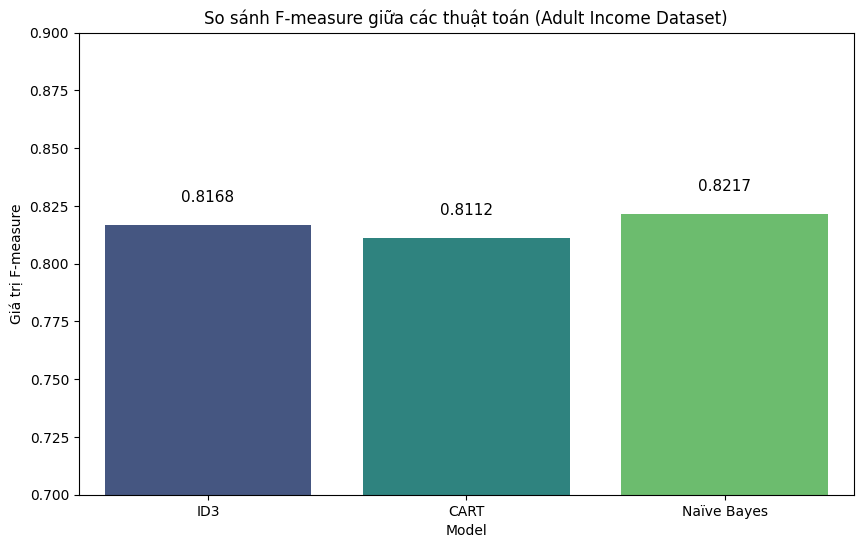

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Nguyễn Thành Luân - 6351071043")
print("1. Đang tải và xử lý dữ liệu Adult Income...")

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

df_train = pd.read_csv(url_train, names=columns, sep=r',\s', engine='python')
df_test = pd.read_csv(url_test, names=columns, sep=r',\s', engine='python', skiprows=1)

df_train.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)
df_train.drop('fnlwgt', axis=1, inplace=True)
df_test.drop('fnlwgt', axis=1, inplace=True)
df_test['income'] = df_test['income'].str.replace('.', '', regex=False)

data = pd.concat([df_train, df_test], ignore_index=True)
features = data.drop('income', axis=1)
labels = data['income']

cat_cols = features.select_dtypes(exclude=['int64']).columns
features_onehot = pd.get_dummies(features, columns=cat_cols)

n_train = len(df_train)
X_train = features_onehot[:n_train]
X_test = features_onehot[n_train:]
y_train = labels[:n_train]
y_test = labels[n_train:]

print(f"- Đã xong. Train size: {X_train.shape}, Test size: {X_test.shape}")

print("\nNguyễn Thành Luân - 6351071043")
print("2. Đang huấn luyện các mô hình...")

clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_id3.fit(X_train, y_train)
id3_pred = clf_id3.predict(X_test)

clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf_cart.fit(X_train, y_train)
cart_pred = clf_cart.predict(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
bayes_pred = gnb.predict(X_test)

print("- Huấn luyện hoàn tất.")

print("\nNguyễn Thành Luân - 6351071043")
print("3. Tính toán F-measure theo yêu cầu trang 32 [cite: 996-1000]...")

def calculate_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    f_measure_manual = (2 * precision * recall) / (precision + recall)

    return [model_name, precision, recall, f_measure_manual]

results = []
results.append(calculate_metrics(y_test, id3_pred, "ID3"))
results.append(calculate_metrics(y_test, cart_pred, "CART"))
results.append(calculate_metrics(y_test, bayes_pred, "Naïve Bayes"))

df_results = pd.DataFrame(results, columns=["Model", "Precision", "Recall", "F-measure"])

print("\nKẾT QUẢ ĐÁNH GIÁ CHI TIẾT:")
print(df_results)

plt.figure(figsize=(10, 6))
bars = sns.barplot(x="Model", y="F-measure", data=df_results, palette="viridis")

for index, row in df_results.iterrows():
    bars.text(index, row['F-measure'] + 0.01, f"{row['F-measure']:.4f}", color='black', ha="center", fontsize=11)

plt.ylim(0.7, 0.9)
plt.title("So sánh F-measure giữa các thuật toán (Adult Income Dataset)")
plt.ylabel("Giá trị F-measure")
plt.show()